For the problem we used the following dataset obtained from Kaggle, which contains different image samples of "Spirochaeta" bacteria, which is a genus of bacteria classified within the phylum Spirochaetes. This dataset includes 366 images. 

[Bacteria detection with darkfield microscopy](https://www.kaggle.com/longnguyen2306/bacteria-detection-with-darkfield-microscopy)

For better access of the images, they were downloaded and uploaded to a personal github repository.
To determine the bacteria inside the image, a percentage of bacteria will be extracted to know if the water is free of contaminants, also, the edges will be counted to count the amount of bacteria

It is necessary to clone the repository for the whole exercise to work.

In [23]:
!git clone https://github.com/AlejandroNunezArroyo/VisionTest.git

fatal: destination path 'VisionTest' already exists and is not an empty directory.


Import image from dataset

Shape: (426, 500)


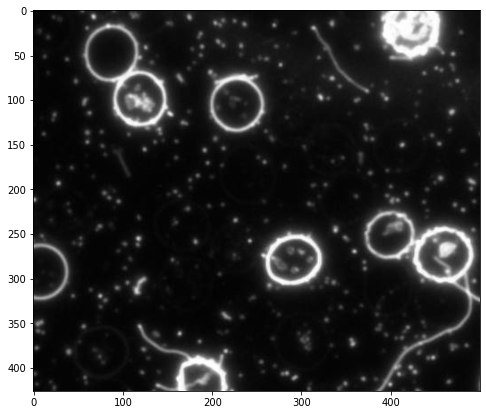

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Read in the image
image = cv2.imread('VisionTest/BacteriaDataset/images/055.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Convert the image to gray Scale
grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print("Shape:", grayscale.shape)

plt.figure(figsize=(8,8))
plt.imshow(grayscale, cmap="gray")

PCA compression is implemented

# Implement PCA

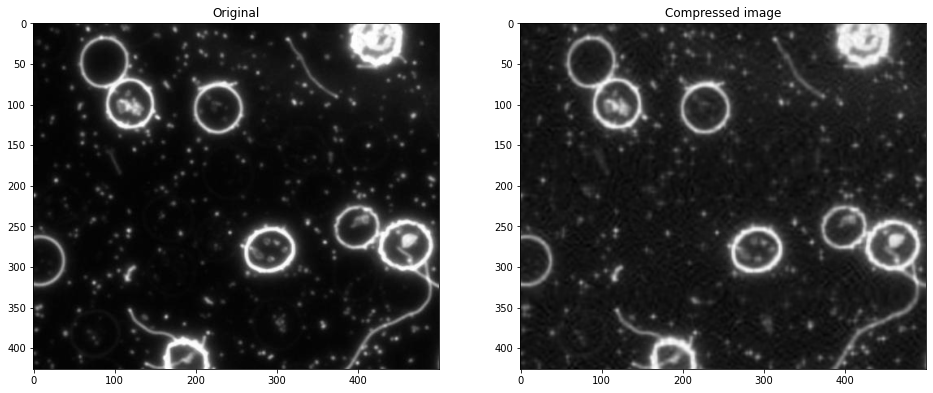

In [25]:
# The PCA module in Sklearn is the most known implementation of PCA.
from sklearn.decomposition import PCA

# First, let's define the number of principal components
n_comp = 50

# Initialize PCA
pca = PCA(n_components=n_comp)

# Standardize the data, so all instances have 0 as the center
pca.fit(grayscale) 

# Find the (n_comp) number of principal components and remove the less important 
# Theres's also another function that joins fit and tranform: pca.Fit_transform()
principal_components = pca.transform(grayscale) 

# PCA.transform also finds the explained_variance_ratio_ , 
# which shows the % of variance explained by each component
# print("explained_variance_ratio_:",pca.explained_variance_ratio_)

# Since PCA reduces the number of columns, we will need to transform the results 
# to the original space to display the compressed image
temp = pca.inverse_transform(principal_components) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.set_title('Original')
ax1.imshow(grayscale, cmap='gray')

ax2.set_title('Compressed image')
ax2.imshow(temp, cmap='gray')

Looking at the images it is necessary to apply canny edge detection and also Implement image threshold. 

(426, 500)
uint8
(426, 500)
uint8


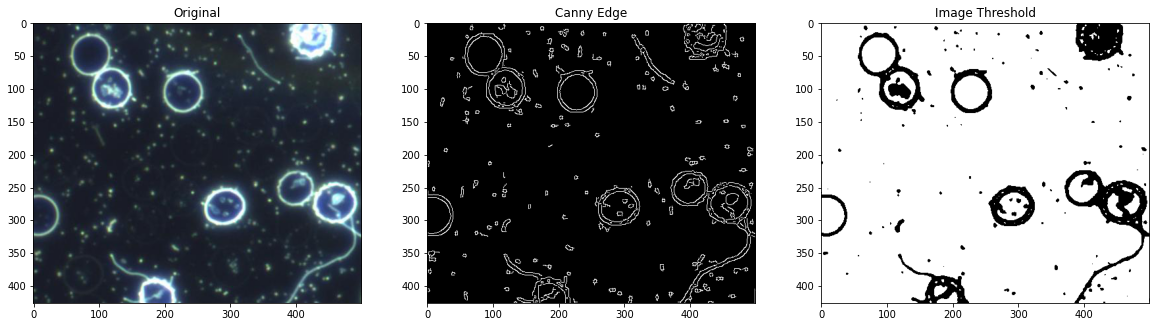

In [26]:
# Implement canny edge detection
temp = np.uint8(temp)
# Implement canny edge detection
canny = cv2.Canny(temp, 50, 150)

# Implement image threshold 
ret, thresh = cv2.threshold(temp,100,180,cv2.THRESH_BINARY_INV)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(image, cmap='gray')

ax2.set_title('Canny Edge')
ax2.imshow(canny, cmap='gray')

ax3.set_title('Image Threshold')
ax3.imshow(thresh, cmap='gray')

print(canny.shape)
print(canny.dtype)

print(thresh.shape)
print(thresh.dtype)

In [27]:
s_1 = np.uint8([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0], 
                   [0, 0, 1, 0, 0], 
                    ])
s_2 = np.ones((5,5),np.uint8)

I used **Closing**, because it is the inverse combination of opening; it is dilation followed by erosion, which is useful for closing small holes or dark areas within an object.
This will make it easier to fill the object in future cells. 

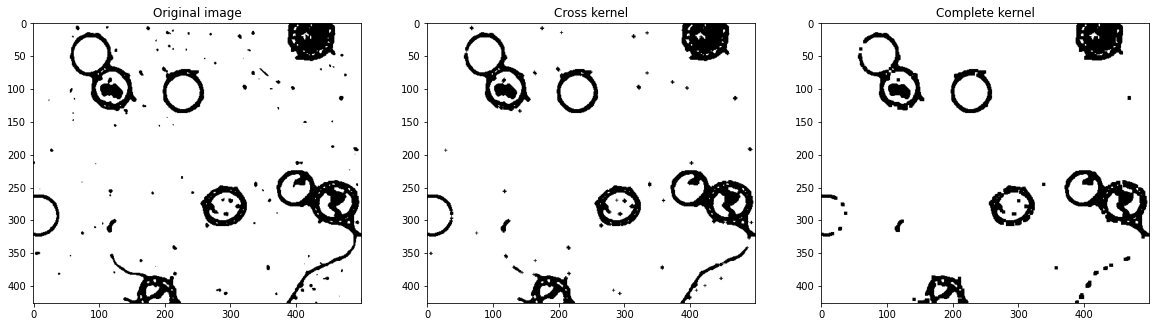

In [28]:
# Reads in a binary image
copy6 = np.copy(thresh)

# Opening the image
closing = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_1)

# Opening the image
closing2 = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_2)

# Display the results
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy6, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(closing, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(closing2, cmap='gray')

After having the contour, we will fill the inside of the image with the following function, this will help us to have the complete images. 

[Reference](https://www.programmersought.com/article/49514022205/)

In [29]:
import cv2
import numpy as np

# Threshold.
th, im_th = cv2.threshold(closing, 50,150, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

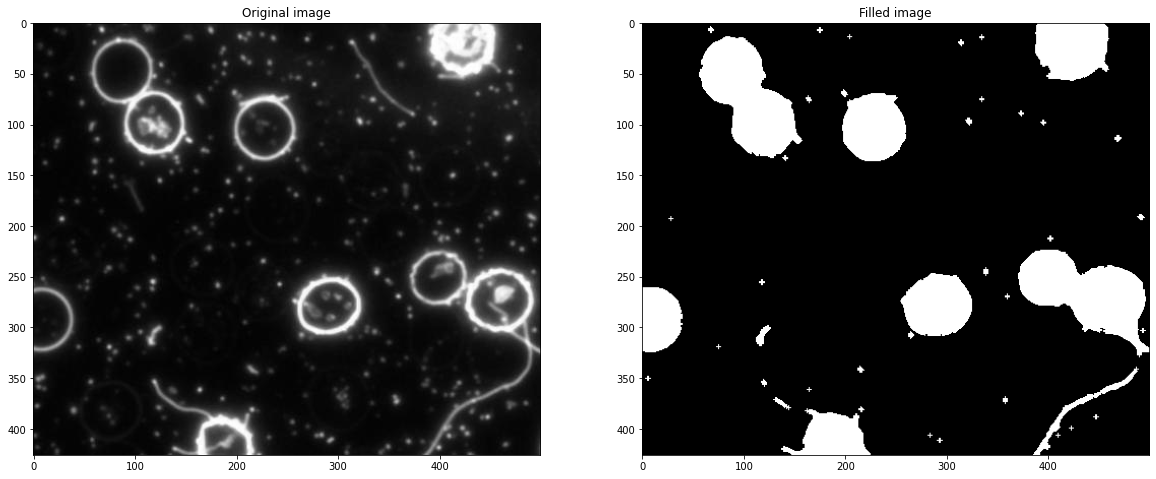

In [30]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(grayscale, cmap='gray')

ax1.set_title('Filled image')
ax1.imshow(im_out, cmap='gray')

To count the bacteria that are in the image we will use the function of finding contours, this will help us to know how many are in the image. 

[Reference](https://www.thepythoncode.com/article/contour-detection-opencv-python)

In [31]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(im_out, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(im_out, contours, -1, (0, 255, 0), 3)

Conclusion

In [32]:
print("Bacterias: ", len(contours))

Bacterias:  43


In [33]:
if np.mean(im_out)>25:
  print("There are bacteria, the percentage: ", np.mean(im_out))
else:
  print("There are not many bacteria, the percentage: ", np.mean(im_out))

There are bacteria, the percentage:  28.020070422535213
